In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
lamost = pd.read_csv('full_data.csv')
lamost.pop('Unnamed: 0')
lamost.head(5)

,obsid,uid,gp_id,designation,obsdate,lmjd,mjd,planid,spid,fiberid,...,logg_err,source_id,solution_id,ra,dec,flux,flux_error,SNR_gaia,mean_snr_lamost,SNR_lamost_mean
0,4302066,G16614776306411,3421375900092772352,J052000.45+271629.1,2011-11-12,55878,55877,GAC_080N28_B1,2,66,...,-9999.0,3421375900092772352,4545469030156206081,80.001905,27.274760,"[4.702319e-17,3.3818403e-17,2.890806e-17,3.197...","[5.6705386e-18,4.096698e-18,3.301896e-18,2.841...",51.742792,2.790,2.790
1,4303076,G16616211403281,3422425109064461184,J051729.38+284840.9,2011-11-12,55878,55877,GAC_080N28_B1,3,76,...,-9999.0,3422425109064461184,4545469030156206081,79.372464,28.811368,"[3.01145e-17,1.9405108e-17,2.3832594e-17,2.871...","[3.5389086e-18,2.5089825e-18,1.987536e-18,1.92...",54.041758,11.546,11.546
2,4516120,G16860278183090,507587382602316544,J020728.65+601542.4,2011-11-13,55879,55878,B7905_1,16,120,...,-9999.0,507587382602316544,4545469030156206081,31.869457,60.261809,"[9.702513e-18,1.07273455e-17,1.2335912e-17,1.1...","[3.0450003e-18,2.2279167e-18,1.8311533e-18,1.5...",54.893125,10.868,10.868
3,4610109,G16866917626282,505387740875111424,J015703.16+580628.4,2011-11-13,55879,55878,B7905_2,10,109,...,-9999.0,505387740875111424,4545469030156206081,29.263210,58.107935,"[7.580544e-17,6.94717e-17,6.2443745e-17,5.8902...","[7.6122446e-18,5.5980374e-18,4.572536e-18,3.87...",60.983448,11.214,11.214
4,5209124,G16603078332937,3443191237286001024,J055322.06+283518.1,2011-11-14,55880,55879,GAC_087N27_B1_1,9,124,...,-9999.0,3443191237286001024,4545469030156206081,88.341968,28.588366,"[5.732198e-17,5.1689034e-17,5.1337413e-17,5.16...","[4.944086e-18,3.747599e-18,3.0944746e-18,2.719...",50.054074,5.320,5.320


In [3]:
gaia = pd.read_csv('flux_gaia.csv')
gaia.pop('Unnamed: 0')
gaia

,336.0,338.0,340.0,342.0,344.0,346.0,348.0,350.0,352.0,354.0,...,1002.0,1004.0,1006.0,1008.0,1010.0,1012.0,1014.0,1016.0,1018.0,1020.0
0,3.360000e+02,3.380000e+02,3.400000e+02,3.420000e+02,3.440000e+02,3.460000e+02,3.480000e+02,3.500000e+02,3.520000e+02,3.540000e+02,...,1.002000e+03,1.004000e+03,1.006000e+03,1.008000e+03,1.010000e+03,1.012000e+03,1.014000e+03,1.016000e+03,1.018000e+03,1.020000e+03
1,4.702319e-17,3.381840e-17,2.890806e-17,3.197863e-17,3.564173e-17,3.332230e-17,2.806158e-17,2.743496e-17,3.304186e-17,3.672462e-17,...,5.069003e-17,4.959312e-17,4.898656e-17,4.743713e-17,4.650921e-17,4.596943e-17,4.492957e-17,4.557578e-17,4.534698e-17,4.696055e-17
2,3.011450e-17,1.940511e-17,2.383259e-17,2.871886e-17,2.614950e-17,2.139932e-17,2.265599e-17,2.731747e-17,2.684658e-17,2.148471e-17,...,3.062854e-17,2.967638e-17,2.922163e-17,2.847382e-17,2.842568e-17,2.898779e-17,2.959787e-17,3.165253e-17,3.332371e-17,3.641728e-17
3,9.702513e-18,1.072735e-17,1.233591e-17,1.193039e-17,9.912628e-18,7.890062e-18,7.508684e-18,9.059178e-18,1.147858e-17,1.269231e-17,...,4.930190e-17,4.845588e-17,4.799734e-17,4.650092e-17,4.548696e-17,4.472800e-17,4.338765e-17,4.363081e-17,4.307414e-17,4.441011e-17
4,7.580544e-17,6.947170e-17,6.244375e-17,5.890222e-17,5.896454e-17,5.800793e-17,5.618475e-17,5.680695e-17,6.051840e-17,6.030938e-17,...,6.729317e-17,6.525996e-17,6.382966e-17,6.122542e-17,5.959073e-17,5.872769e-17,5.760303e-17,5.909294e-17,5.990813e-17,6.356432e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,3.259702e-16,3.077689e-16,2.847433e-16,2.748445e-16,2.731809e-16,2.674935e-16,2.662898e-16,2.726458e-16,2.825643e-16,2.892657e-16,...,4.595932e-16,4.517270e-16,4.492571e-16,4.391697e-16,4.358637e-16,4.372045e-16,4.344595e-16,4.483663e-16,4.534892e-16,4.763166e-16
1109,6.319763e-17,4.962959e-17,3.742732e-17,3.509757e-17,4.259903e-17,4.936463e-17,4.799473e-17,4.203639e-17,4.182081e-17,4.679952e-17,...,3.098675e-16,3.042723e-16,3.031971e-16,2.979867e-16,2.983904e-16,3.029051e-16,3.051844e-16,3.193585e-16,3.269070e-16,3.462371e-16
1110,9.230867e-16,9.480213e-16,9.333781e-16,9.015530e-16,8.821834e-16,8.648405e-16,8.454087e-16,8.185249e-16,8.118505e-16,8.222287e-16,...,2.095709e-17,2.055011e-17,2.047580e-17,2.013796e-17,2.018603e-17,2.051400e-17,2.069284e-17,2.168844e-17,2.225877e-17,2.367746e-17
1111,1.457715e-16,1.407476e-16,1.331949e-16,1.205521e-16,1.138703e-16,1.168624e-16,1.216970e-16,1.188446e-16,1.183607e-16,1.305205e-16,...,1.470846e-16,1.471671e-16,1.487900e-16,1.473482e-16,1.472975e-16,1.476421e-16,1.452061e-16,1.468066e-16,1.441144e-16,1.459133e-16


In [4]:
param = pd.read_csv('parameter yg tersedia')
#param.pop('Unnamed: 0')
param

,source_id,parallax,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,logg_gspphot,teff_gspphot,mh_gspphot
0,3421375900092772352,0.807234,13.880873,0.986093,NaN,NaN,4.0996,9442.5350,-0.7773
1,3422425109064461184,0.591876,14.216793,0.849067,NaN,NaN,4.1700,7989.1950,-0.5155
2,507587382602316544,0.670442,14.406285,1.488364,5.927681,5.506062,3.5397,8880.6710,-0.1447
3,3443191237286001024,0.519595,14.077073,0.488182,NaN,NaN,4.0373,9553.6650,-1.3164
4,199846855507462144,4.264049,10.235985,0.719276,-21.439533,0.450973,4.1341,6833.2060,-0.6632
...,...,...,...,...,...,...,...,...,...
573,3383098876674928896,0.810216,11.949348,0.207321,-4.424756,5.843917,3.9871,8983.1570,-0.4072
574,603085739904178816,2.256620,11.406276,0.826352,9.941437,0.291888,4.0421,5654.9280,-0.1531
575,3140492456344220544,0.836845,11.474646,1.158264,49.908546,0.626855,3.1232,5858.4624,-0.1219
576,1341799048000581376,1.660910,12.558516,0.978560,-28.108750,0.777249,4.0685,5478.9644,-0.2601


In [5]:
gaia = gaia.drop([0])
gaia = gaia*1e+20
ab = lamost.wd_subclass.tolist()
gaia['wd_subclass'] = ab
gaia

,336.0,338.0,340.0,342.0,344.0,346.0,348.0,350.0,352.0,354.0,...,1004.0,1006.0,1008.0,1010.0,1012.0,1014.0,1016.0,1018.0,1020.0,wd_subclass
1,4702.31900,3381.84030,2890.80600,3197.86300,3564.17270,3332.22960,2806.15830,2743.49640,3304.1860,3672.462200,...,4959.3124,4898.6562,4743.7134,4650.9210,4596.9428,4492.9572,4557.5782,4534.6980,4696.0552,DAZ
2,3011.45000,1940.51080,2383.25940,2871.88640,2614.94970,2139.93230,2265.59870,2731.74730,2684.6575,2148.470500,...,2967.6380,2922.1630,2847.3817,2842.5675,2898.7790,2959.7870,3165.2526,3332.3712,3641.7278,DA
3,970.25130,1072.73455,1233.59120,1193.03930,991.26280,789.00620,750.86840,905.91780,1147.8581,1269.230700,...,4845.5883,4799.7337,4650.0920,4548.6963,4472.8000,4338.7648,4363.0806,4307.4140,4441.0106,DAZ
4,7580.54400,6947.17000,6244.37450,5890.22150,5896.45400,5800.79300,5618.47500,5680.69460,6051.8400,6030.938000,...,6525.9964,6382.9660,6122.5420,5959.0727,5872.7690,5760.3030,5909.2940,5990.8126,6356.4324,DA
5,5732.19800,5168.90340,5133.74130,5163.23720,5002.85550,4764.12900,4716.81780,4726.41300,4686.2766,4691.796200,...,2567.2482,2459.8012,2303.8955,2184.8419,2098.0940,2012.5440,2035.1816,2057.5860,2205.8267,DA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,32597.02000,30776.88700,28474.33000,27484.45400,27318.08600,26749.34800,26628.97700,27264.57700,28256.4340,28926.567000,...,45172.6960,44925.7060,43916.9750,43586.3670,43720.4470,43445.9530,44836.6300,45348.9200,47631.6640,DA
1109,6319.76250,4962.95900,3742.73250,3509.75650,4259.90270,4936.46270,4799.47330,4203.63860,4182.0806,4679.952000,...,30427.2260,30319.7080,29798.6700,29839.0440,30290.5070,30518.4360,31935.8530,32690.7020,34623.7130,DA
1110,92308.67000,94802.13000,93337.81000,90155.30000,88218.34000,86484.05400,84540.86600,81852.49000,81185.0530,82222.870000,...,2055.0110,2047.5799,2013.7963,2018.6034,2051.4003,2069.2841,2168.8440,2225.8765,2367.7464,DA
1111,14577.14500,14074.75600,13319.48900,12055.20700,11387.02800,11686.23600,12169.69700,11884.46300,11836.0740,13052.046000,...,14716.7120,14879.0020,14734.8210,14729.7480,14764.2100,14520.6120,14680.6570,14411.4440,14591.3270,DA


# Membuat model regresi untuk teff

In [6]:
scid = lamost.source_id.tolist()
gaia['source_id'] = scid

# membuat data untuk diolah
teffdata = param[['source_id','teff_gspphot']]
df2 = gaia.drop('wd_subclass', axis=1)
teffdata = teffdata.merge(df2, on = 'source_id', how = 'left')
teffdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 0 to 1231
Columns: 345 entries, source_id to 1020.0
dtypes: float64(344), int64(1)
memory usage: 3.3 MB


In [29]:
teffdata.source_id.to_csv('teffdata_sc_id.csv',index=False)

### Train-Test Split untuk Teff

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = teffdata.drop(['source_id','teff_gspphot'], axis=1)
y = teffdata['teff_gspphot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape, X_test.shape

((985, 343), (247, 343))

### Training

# Trying model from Kaggle

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators = 500,
                                                              random_state=0))
                             ])

In [78]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=8,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [1228.96295293 1045.3309391   710.02074358    3.37922339   17.82333021
   55.07126135   23.79432663  501.75660979]


In [79]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
448.2674233722565


In [50]:
#save score teff
teffscores = scores
teffavgMAE = scores.mean()

In [40]:
teffavgMAE

448.2674233722565

In [16]:
X = teffdata.drop(['source_id','teff_gspphot'], axis=1)
y = teffdata['teff_gspphot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
rfc = RandomForestRegressor(n_estimators=500, max_features = 100, oob_score=True)
rfc.fit(X_train, y_train)

RandomForestRegressor(max_features=100, n_estimators=500, oob_score=True)

In [19]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features.head(3)

,feature,importance
26,388.0,0.069195
25,386.0,0.069080
24,384.0,0.048083


In [20]:
from sklearn.metrics import mean_absolute_error

val_pred = rfc.predict(X_test)
val_mae = mean_absolute_error(val_pred, y_test)
print("Validation MAE : {:,.0f}".format(val_mae))

Validation MAE : 430


In [1]:
 p =1

# Membuat model regresi untuk logg

In [7]:
# membuat data untuk diolah
loggdata = param[['source_id','logg_gspphot']]
df2 = gaia.drop('wd_subclass', axis=1)
loggdata = loggdata.merge(df2, on = 'source_id', how = 'left')
loggdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 0 to 1231
Columns: 345 entries, source_id to 1020.0
dtypes: float64(344), int64(1)
memory usage: 3.3 MB


In [9]:
loggdata.source_id.to_csv('loggdata_sc_id.csv',index=False)

### Train-Test Split untuk Logg

In [28]:
from sklearn.model_selection import train_test_split

X = loggdata.drop(['source_id','logg_gspphot'], axis=1)
y = loggdata['logg_gspphot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
#df_all_features.head(30)
df_all_features

,feature,importance
24,384.0,0.151641
27,390.0,0.108808
22,380.0,0.089729
28,392.0,0.077634
25,386.0,0.062863
...,...,...
208,752.0,0.000113
198,732.0,0.000106
248,832.0,0.000106
209,754.0,0.000105


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))
                             ])

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=8,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

#save score teff
loggscores = scores
loggavgMAE = scores.mean()

MAE scores:
 [0.30300965 0.32219952 0.23052218 0.00037655 0.00851457 0.00140331
 0.00191236 0.19237348]
Average MAE score (across experiments):
0.1325389529220794


In [46]:
from sklearn.model_selection import train_test_split

X = loggdata.drop(['source_id','logg_gspphot'], axis=1)
y = loggdata['logg_gspphot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
rfc = RandomForestRegressor(n_estimators=500, max_features = 100, oob_score=True)
rfc.fit(X_train, y_train)

RandomForestRegressor(max_features=100, n_estimators=500, oob_score=True)

In [48]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features.head(3)

,feature,importance
24,384.0,0.128631
27,390.0,0.111285
22,380.0,0.082710


In [49]:
from sklearn.metrics import mean_absolute_error

val_pred = rfc.predict(X_test)
val_mae = mean_absolute_error(val_pred, y_test)
print("Validation MAE : {:,.9f}".format(val_mae))

Validation MAE : 0.130272770


# Membuat model regresi untuk mh

In [8]:
# membuat data untuk diolah
mhdata = param[['source_id','mh_gspphot']]
df2 = gaia.drop('wd_subclass', axis=1)
mhdata = mhdata.merge(df2, on = 'source_id', how = 'left')
mhdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 0 to 1231
Columns: 345 entries, source_id to 1020.0
dtypes: float64(344), int64(1)
memory usage: 3.3 MB


In [165]:
mhdata.source_id.to_csv('mhdata_sc_id.csv',index=False)

### Train Test Split untuk M/H

In [93]:
from sklearn.model_selection import train_test_split

X = mhdata.drop(['source_id','mh_gspphot'], axis=1)
y = mhdata['mh_gspphot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
#df_all_features.head(30)
df_all_features

,feature,importance
25,386.0,0.104829
115,566.0,0.085713
120,576.0,0.059856
119,574.0,0.038723
17,370.0,0.022735
...,...,...
222,780.0,0.000343
255,846.0,0.000339
234,804.0,0.000273
266,868.0,0.000226


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))
                             ])

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=8,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

#save score teff
mhscores = scores
mhavgMAE = scores.mean()

MAE scores:
 [0.27412119 0.23412729 0.16448326 0.00261082 0.01377462 0.00336748
 0.0147914  0.15162884]
Average MAE score (across experiments):
0.10736311363636378


### Find average to complete data

In [172]:
np.mean(teff.teff_gspphot)

7972.904650487088

In [173]:
np.mean(logg.logg_gspphot)

3.6090767857142763

In [174]:
np.mean(mh.mh_gspphot)

-0.3534436688311658

In [94]:
from sklearn.model_selection import train_test_split

X = mhdata.drop(['source_id','mh_gspphot'], axis=1)
y = mhdata['mh_gspphot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
rfc = RandomForestRegressor(n_estimators=500, max_depth = 40, oob_score=True)
rfc.fit(X_train, y_train)

RandomForestRegressor(max_depth=40, n_estimators=500, oob_score=True)

In [96]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features.head(3)

,feature,importance
25,386.0,0.103050
115,566.0,0.077991
119,574.0,0.051439


In [97]:
from sklearn.metrics import mean_absolute_error

val_pred = rfc.predict(X_test)
val_mae = mean_absolute_error(val_pred, y_test)
print("Validation MAE : {:,.9f}".format(val_mae))

Validation MAE : 0.088544713


# CEK AVERAGE ERROR DARI GAIA

### Temperatur Efektif

In [13]:
teff = pd.read_csv('download (12).csv')
teff.head(3)

,source_id,teff_gspphot,teff_gspphot_upper,teff_gspphot_lower
0,3421375900092772352,9442.535,9495.9540,9190.695
1,3422425109064461184,7989.195,7995.8115,7978.676
2,507587382602316544,8880.671,8990.1330,8738.685


In [88]:
teff['teff_error'] = (teff.teff_gspphot_upper + teff.teff_gspphot_lower)/2
teff.head(3)

,source_id,teff_gspphot,teff_gspphot_upper,teff_gspphot_lower,teff_error,delta_teff
0,3421375900092772352,9442.535,9495.9540,9190.695,9343.32450,99.21050
1,3422425109064461184,7989.195,7995.8115,7978.676,7987.24375,1.95125
2,507587382602316544,8880.671,8990.1330,8738.685,8864.40900,16.26200


In [89]:
#Mencari selisih error
teff['delta_teff'] = abs(teff.teff_gspphot - teff.teff_error)
mean_avg_teff_error = np.mean(teff.delta_teff)
mean_avg_teff_error

39.34994655032477

In [90]:
mn = abs(teff.teff_gspphot - teff.teff_gspphot_upper)
mn = np.mean(mn)
mn

60.88356810064923

In [91]:
mn1 = abs(teff.teff_gspphot - teff.teff_gspphot_lower)
mn1 = np.mean(mn1)
mn1

130.64413425324605

### Gravitasi Permukaan

In [17]:
logg = pd.read_csv('download (13).csv')
logg.head(3)

,source_id,logg_gspphot,logg_gspphot_upper,logg_gspphot_lower
0,3421375900092772352,4.0996,4.1237,3.9425
1,3422425109064461184,4.1700,4.2080,4.1251
2,507587382602316544,3.5397,3.5718,3.5002


In [18]:
logg['logg_error'] = (logg.logg_gspphot_upper + logg.logg_gspphot_lower)/2
logg.head(3)

,source_id,logg_gspphot,logg_gspphot_upper,logg_gspphot_lower,logg_error
0,3421375900092772352,4.0996,4.1237,3.9425,4.03310
1,3422425109064461184,4.1700,4.2080,4.1251,4.16655
2,507587382602316544,3.5397,3.5718,3.5002,3.53600


In [19]:
#Mencari selisih error
logg['delta_logg'] = abs(logg.logg_gspphot - logg.logg_error)
mean_avg_logg_error = np.mean(logg.delta_logg)
mean_avg_logg_error

0.01359411525974006

In [146]:
mn = abs(logg.logg_gspphot - logg.logg_gspphot_upper)
mn = np.mean(mn)
mn

0.032683198051948366

In [147]:
mn1 = abs(logg.logg_gspphot - logg.logg_gspphot_lower)
mn1 = np.mean(mn1)
mn1

0.04757029220779202

### mh

In [20]:
mh = pd.read_csv('download (15).csv')
mh.head(3)

,source_id,mh_gspphot,mh_gspphot_upper,mh_gspphot_lower
0,3421375900092772352,-0.7773,-0.4526,-1.0646
1,3422425109064461184,-0.5155,-0.4735,-0.5514
2,507587382602316544,-0.1447,-0.1327,-0.1812


In [21]:
mh['mh_error'] = (mh.mh_gspphot_upper + mh.mh_gspphot_lower)/2
mh.head(3)

,source_id,mh_gspphot,mh_gspphot_upper,mh_gspphot_lower,mh_error
0,3421375900092772352,-0.7773,-0.4526,-1.0646,-0.75860
1,3422425109064461184,-0.5155,-0.4735,-0.5514,-0.51245
2,507587382602316544,-0.1447,-0.1327,-0.1812,-0.15695


In [22]:
#Mencari selisih error
mh['delta_mh'] = abs(mh.mh_gspphot - mh.mh_error)
mean_avg_mh_error = np.mean(mh.delta_mh)
mean_avg_mh_error

0.006399107142857223

In [175]:
mn = abs(mh.mh_gspphot - mh.mh_gspphot_upper)
mn = np.mean(mn)
mn

0.03584870129870126

In [176]:
mn = abs(mh.mh_gspphot - mh.mh_gspphot_lower)
mn = np.mean(mn)
mn

0.028310064935064605

### Error percentage

In [90]:
teffpercentage = 431/(np.mean(teffdata.teff_gspphot))*100
teffpercentage

5.405809035652633

In [178]:
teffpercentage = 130/(np.mean(teff.teff_gspphot))*100
teffpercentage

1.6305224469485902

In [179]:
teffpercentage = 60.883/(np.mean(teff.teff_gspphot))*100
teffpercentage

0.7636238318274694

In [180]:
loggpercentage = 0.131/(np.mean(logg.logg_gspphot))*100
loggpercentage

3.629737126085381

In [181]:
loggpercentage = 0.047/(np.mean(logg.logg_gspphot))*100
loggpercentage

1.3022720986718541

In [182]:
loggpercentage = 0.032/(np.mean(logg.logg_gspphot))*100
loggpercentage

0.8866533437765816

In [102]:
mhpercentage = 0.088/(np.mean(abs(mhdata.mh_gspphot)))*100
mhpercentage

22.906934241024214

In [103]:
mhpercentage = 0.028/(np.mean(abs(mhdata.mh_gspphot)))*100
mhpercentage

7.288569985780431

In [104]:
mhpercentage = 0.035/(np.mean(abs(mhdata.mh_gspphot)))*100
mhpercentage

9.11071248222554

# Siapin data lamost

In [53]:
lamost = pd.read_csv('full_data.csv')
lamost.head(3)

,Unnamed: 0,obsid,uid,gp_id,designation,obsdate,lmjd,mjd,planid,spid,...,logg_err,source_id,solution_id,ra,dec,flux,flux_error,SNR_gaia,mean_snr_lamost,SNR_lamost_mean
0,14,4302066,G16614776306411,3421375900092772352,J052000.45+271629.1,2011-11-12,55878,55877,GAC_080N28_B1,2,...,-9999.0,3421375900092772352,4545469030156206081,80.001905,27.274760,"[4.702319e-17,3.3818403e-17,2.890806e-17,3.197...","[5.6705386e-18,4.096698e-18,3.301896e-18,2.841...",51.742792,2.790,2.790
1,16,4303076,G16616211403281,3422425109064461184,J051729.38+284840.9,2011-11-12,55878,55877,GAC_080N28_B1,3,...,-9999.0,3422425109064461184,4545469030156206081,79.372464,28.811368,"[3.01145e-17,1.9405108e-17,2.3832594e-17,2.871...","[3.5389086e-18,2.5089825e-18,1.987536e-18,1.92...",54.041758,11.546,11.546
2,27,4516120,G16860278183090,507587382602316544,J020728.65+601542.4,2011-11-13,55879,55878,B7905_1,16,...,-9999.0,507587382602316544,4545469030156206081,31.869457,60.261809,"[9.702513e-18,1.07273455e-17,1.2335912e-17,1.1...","[3.0450003e-18,2.2279167e-18,1.8311533e-18,1.5...",54.893125,10.868,10.868


In [54]:
wd = []
for i in lamost.wd_subclass:
    if i == 'DA':
        wd.append('DA')
    elif i == 'DAZ':
        wd.append('DAZ')
    else :
        wd.append('Non DA & DAZ')
lamost['wd_subclass'] = wd

# Parameter data

In [55]:
teffdata.head(3)

,source_id,teff_gspphot,336.0,338.0,340.0,342.0,344.0,346.0,348.0,350.0,...,1002.0,1004.0,1006.0,1008.0,1010.0,1012.0,1014.0,1016.0,1018.0,1020.0
0,3421375900092772352,9442.535,4702.3190,3381.84030,2890.8060,3197.8630,3564.1727,3332.2296,2806.1583,2743.4964,...,5069.0030,4959.3124,4898.6562,4743.7134,4650.9210,4596.9428,4492.9572,4557.5782,4534.6980,4696.0552
1,3422425109064461184,7989.195,3011.4500,1940.51080,2383.2594,2871.8864,2614.9497,2139.9323,2265.5987,2731.7473,...,3062.8536,2967.6380,2922.1630,2847.3817,2842.5675,2898.7790,2959.7870,3165.2526,3332.3712,3641.7278
2,507587382602316544,8880.671,970.2513,1072.73455,1233.5912,1193.0393,991.2628,789.0062,750.8684,905.9178,...,4930.1903,4845.5883,4799.7337,4650.0920,4548.6963,4472.8000,4338.7648,4363.0806,4307.4140,4441.0106


In [56]:
lamostteff = lamost[['source_id','wd_subclass']]
lamostteff.head(3)

,source_id,wd_subclass
0,3421375900092772352,DAZ
1,3422425109064461184,DA
2,507587382602316544,DAZ


In [57]:
teff = teffdata.merge(lamostteff, on = 'source_id', how = 'inner')
teff.head()

,source_id,teff_gspphot,336.0,338.0,340.0,342.0,344.0,346.0,348.0,350.0,...,1004.0,1006.0,1008.0,1010.0,1012.0,1014.0,1016.0,1018.0,1020.0,wd_subclass
0,3421375900092772352,9442.535,4702.3190,3381.84030,2890.8060,3197.8630,3564.1727,3332.2296,2806.1583,2743.4964,...,4959.3124,4898.6562,4743.7134,4650.9210,4596.9428,4492.9572,4557.5782,4534.6980,4696.0552,DAZ
1,3422425109064461184,7989.195,3011.4500,1940.51080,2383.2594,2871.8864,2614.9497,2139.9323,2265.5987,2731.7473,...,2967.6380,2922.1630,2847.3817,2842.5675,2898.7790,2959.7870,3165.2526,3332.3712,3641.7278,DA
2,507587382602316544,8880.671,970.2513,1072.73455,1233.5912,1193.0393,991.2628,789.0062,750.8684,905.9178,...,4845.5883,4799.7337,4650.0920,4548.6963,4472.8000,4338.7648,4363.0806,4307.4140,4441.0106,DAZ
3,3443191237286001024,9553.665,5732.1980,5168.90340,5133.7413,5163.2372,5002.8555,4764.1290,4716.8178,4726.4130,...,2567.2482,2459.8012,2303.8955,2184.8419,2098.0940,2012.5440,2035.1816,2057.5860,2205.8267,DA
4,199846855507462144,6833.206,193952.8800,187640.01000,172308.5200,156649.6700,154267.8100,158957.9400,157478.8400,147123.1100,...,98697.1200,97947.6800,95624.3200,94872.6800,95224.5800,94762.7500,97982.1900,99289.2800,104430.3700,DA


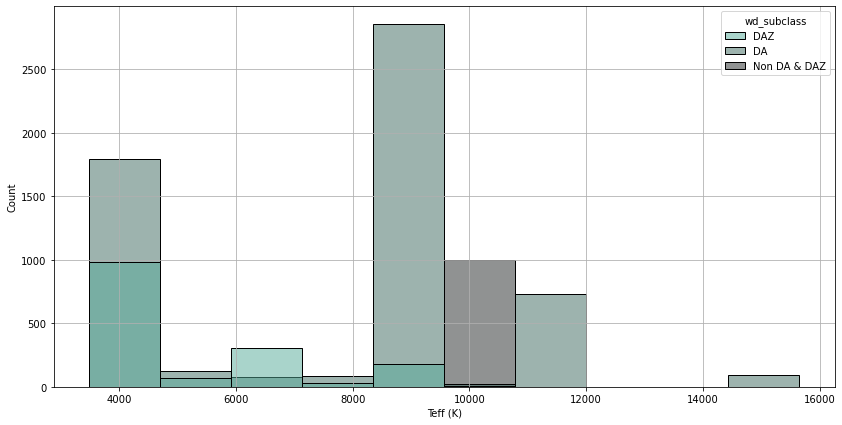

In [58]:
plt.figure(figsize=(14,7))
sns.histplot(x=teff.teff_gspphot[teff.teff_gspphot < 16000], hue=teff['wd_subclass'], palette="dark:#5A9_r", bins=10)
plt.xlabel('Teff (K)')
plt.grid()

In [59]:
palette = sns.color_palette("dark:#5A9_r", 3).as_hex()

In [60]:
palette

['#55aa99', '#3c685f', '#232626']

In [61]:
print(palette)

['#55aa99', '#3c685f', '#232626']


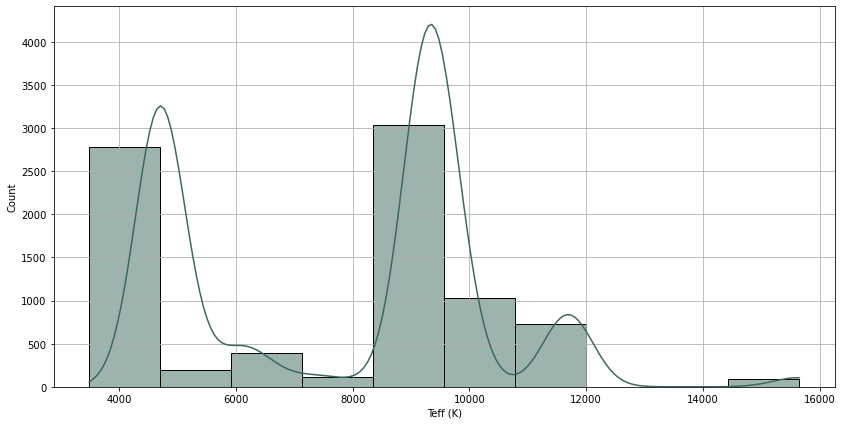

In [62]:
plt.figure(figsize=(14,7))
sns.histplot(x=teff.teff_gspphot[teff.teff_gspphot < 16000], kde=True, color='#3c685f', bins=10)
plt.xlabel('Teff (K)')
plt.grid()

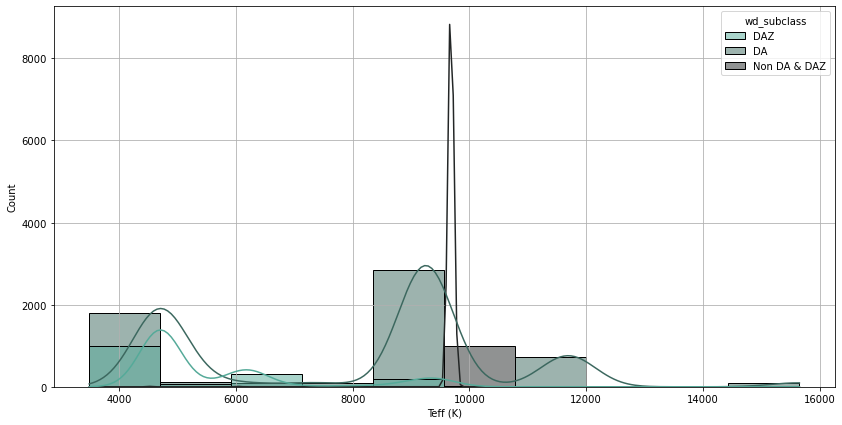

In [76]:
plt.figure(figsize=(14,7))
sns.histplot(x=teff.teff_gspphot[teff.teff_gspphot < 16000], hue = teff.wd_subclass, kde=True, palette="dark:#5A9_r", bins=10)
plt.xlabel('Teff (K)')
plt.grid()

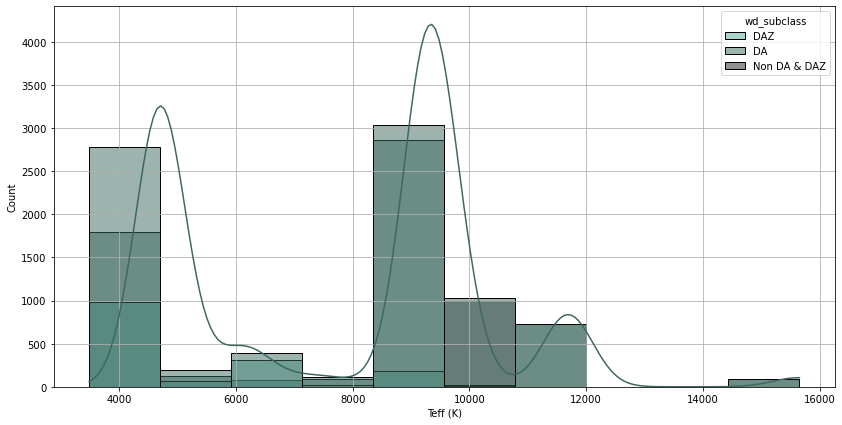

In [88]:
plt.figure(figsize=(14,7))
sns.histplot(x=teff.teff_gspphot[teff.teff_gspphot < 16000], hue=teff['wd_subclass'], palette="dark:#5A9_r", bins=10)
sns.histplot(x=teff.teff_gspphot[teff.teff_gspphot < 16000], kde="True",bins=10, color='#3c685f')
plt.xlabel('Teff (K)')
plt.grid()

### Distribusi Teff lamost

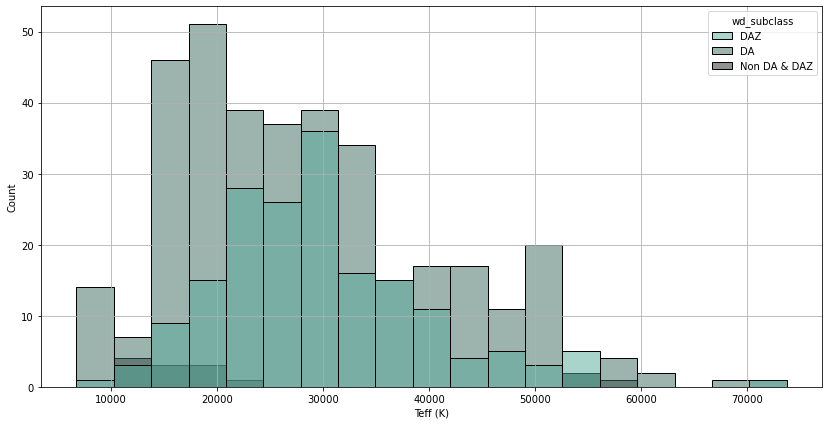

In [63]:
plt.figure(figsize=(14,7))
sns.histplot(x=lamost.teff[lamost.teff != -9999], hue=lamost['wd_subclass'], palette="dark:#5A9_r")
plt.xlabel('Teff (K)')
plt.grid()

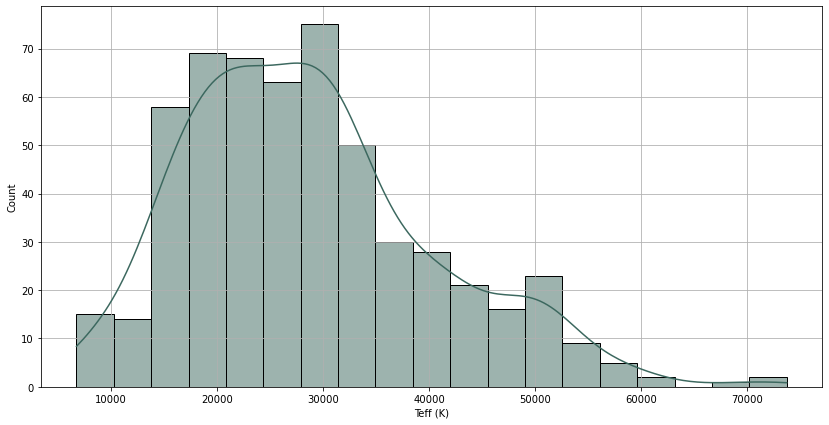

In [65]:
plt.figure(figsize=(14,7))
sns.histplot(x=lamost.teff[lamost.teff != -9999], kde=True, color='#3c685f')
plt.xlabel('Teff (K)')
plt.grid()

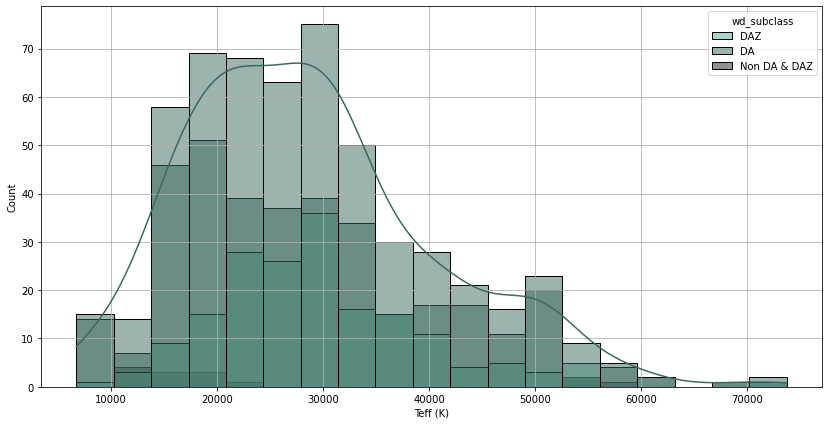

In [84]:
plt.figure(figsize=(14,7))
sns.histplot(x=lamost.teff[lamost.teff != -9999], hue=lamost['wd_subclass'], palette="dark:#5A9_r")
sns.histplot(x=lamost.teff[lamost.teff != -9999], kde="True", color='#3c685f')
plt.xlabel('Teff (K)')
plt.grid()

# Parameter data Log G

In [25]:
logg = pd.read_csv('download (13).csv')
logg.head(3)

,source_id,logg_gspphot,logg_gspphot_upper,logg_gspphot_lower
0,3421375900092772352,4.0996,4.1237,3.9425
1,3422425109064461184,4.1700,4.2080,4.1251
2,507587382602316544,3.5397,3.5718,3.5002


In [27]:
lamost = pd.read_csv('full_data.csv')
lamost = lamost[['source_id','wd_subclass']]
lamost.head(3)

,source_id,wd_subclass
0,3421375900092772352,DAZ
1,3422425109064461184,DA
2,507587382602316544,DAZ


In [28]:
wd = []
for i in lamost.wd_subclass :
    if i == 'DA':
        wd.append('DA')
    elif i == 'DAZ':
        wd.append('DAZ')
    else :
        wd.append('Non DA & DAZ')
lamost['wd_subclass'] = wd

In [30]:
logg = lamost.merge(logg, on = 'source_id', how = 'inner')
logg.head(3)

,source_id,wd_subclass,logg_gspphot,logg_gspphot_upper,logg_gspphot_lower
0,3421375900092772352,DAZ,4.0996,4.1237,3.9425
1,3422425109064461184,DA,4.1700,4.2080,4.1251
2,507587382602316544,DAZ,3.5397,3.5718,3.5002


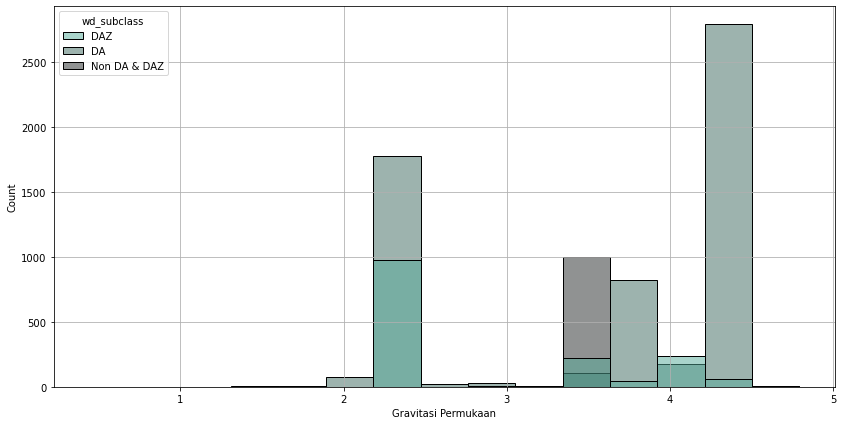

In [34]:
plt.figure(figsize=(14,7))
sns.histplot(x=logg.logg_gspphot, hue=logg['wd_subclass'], palette="dark:#5A9_r", bins=15)
plt.xlabel('Gravitasi Permukaan')
plt.grid()